# Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
from PIL import Image, ImageEnhance
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# Loading & viewing the photos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cat_files = os.listdir('/content/drive/MyDrive/Data sets/cats & dogs/cats')
dog_files = os.listdir('/content/drive/MyDrive/Data sets/cats & dogs/dogs')

print(len(cat_files))
print(len(dog_files))

2500
2500


In [ ]:
cat_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/cats & dogs/cats', img)) for img in cat_files]
dog_images = [cv2.imread(os.path.join('/content/drive/MyDrive/Data sets/cats & dogs/dogs', img)) for img in dog_files]

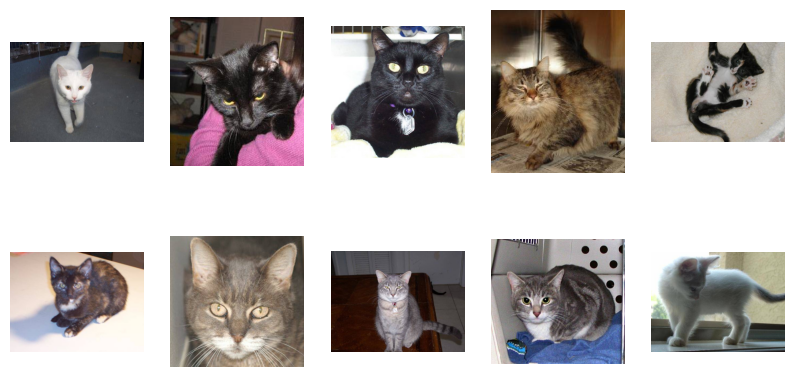

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(cat_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

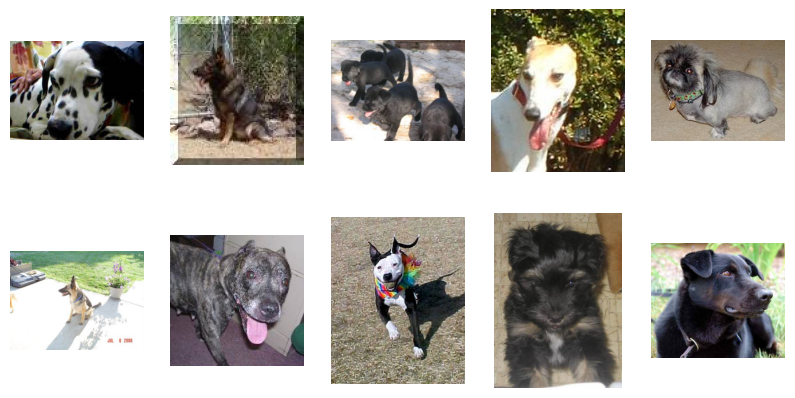

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(dog_images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# Resizing images

In [ ]:
#resizing images to a standard

for i in range(len(cat_images)):
  cat_images[i] = cv2.resize(cat_images[i], (32, 32), interpolation = cv2.INTER_CUBIC)

for i in range(len(dog_images)):
  dog_images[i] = cv2.resize(dog_images[i], (32, 32), interpolation = cv2.INTER_CUBIC)

In [ ]:
print(cat_images[7].shape)
print(dog_images[0].shape)

(32, 32, 3)
(32, 32, 3)


# Adding labels & creating the dataset

In [ ]:
dataset = []
label = []


for file in cat_files:
  image = cv2.imread('/content/drive/MyDrive/Data sets/cats & dogs/cats/' + file)
  image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(0)

In [ ]:
for file in dog_files:
  image = cv2.imread('/content/drive/MyDrive/Data sets/cats & dogs/dogs/' + file)
  image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
  image = Image.fromarray(image, 'RGB')
  dataset.append(np.array(image))
  label.append(1)

# Splitting the data into train, validation & test

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(dataset, label, test_size=0.2, random_state=42)

# Normalizing the data

In [ ]:
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_test = np.array(X_test) / 255.0

In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Creating ANN model

In [ ]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model1.add(keras.layers.Dense(5000, activation="relu"))
model1.add(keras.layers.Dense(2, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Creating another ANN model with early stopping for comparison

In [ ]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model2.add(keras.layers.Dense(5000, activation="relu"))
model2.add(keras.layers.Dense(2, activation="sigmoid"))

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

model2.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

# Training & testing model 1

In [ ]:
history_1 = model1.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size = 20)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 64s 311ms/step - accuracy: 0.5147 - loss: 3.2297 - val_accuracy: 0.6010 - val_loss: 0.6703
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 311ms/step - accuracy: 0.5784 - loss: 0.6876 - val_accuracy: 0.5740 - val_loss: 0.6764
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 313ms/step - accuracy: 0.5833 - loss: 0.6722 - val_accuracy: 0.6100 - val_loss: 0.6560
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 319ms/step - accuracy: 0.6083 - loss: 0.6602 - val_accuracy: 0.5620 - val_loss: 0.6837
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - accuracy: 0.6089 - loss: 0.6576 - val_accuracy: 0.6010 - val_loss: 0.6625
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 319ms/step - accuracy: 0.6291 - loss: 0.6396 - val_accuracy: 0.6260 - val_loss: 0.6414
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 322ms/step - accuracy: 0.6319 - loss: 0.6379 - val_accuracy: 0.5910 - val_loss: 0.6603
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 320ms/step - accuracy: 0.6407 - loss: 0

In [ ]:
model1.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6172 - loss: 0.7100


[0.6827724575996399, 0.652999997138977]

# Training & testing model 2

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

history_2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[callback], batch_size = 20)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 67s 331ms/step - accuracy: 0.5087 - loss: 2.2754 - val_accuracy: 0.5150 - val_loss: 0.7471
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 68s 338ms/step - accuracy: 0.5658 - loss: 0.6832 - val_accuracy: 0.5950 - val_loss: 0.6631
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 66s 331ms/step - accuracy: 0.6133 - loss: 0.6560 - val_accuracy: 0.5530 - val_loss: 0.6734
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.6082 - loss: 0.6529 - val_accuracy: 0.6090 - val_loss: 0.6494
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 323ms/step - accuracy: 0.6148 - loss: 0.6449 - val_accuracy: 0.6370 - val_loss: 0.6418
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 320ms/step - accuracy: 0.6164 - loss: 0.6473 - val_accuracy: 0.6280 - val_loss: 0.6402
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 320ms/step - accuracy: 0.6410 - loss: 0.6371 - val_accuracy: 0.6060 - val_loss: 0.6504
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 64s 318ms/step - accuracy: 0.6461 - loss: 0

In [ ]:
model2.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6133 - loss: 0.6511


[0.6402081847190857, 0.628000020980835]

# Visualizing the accuracy of model_1 at train & validation

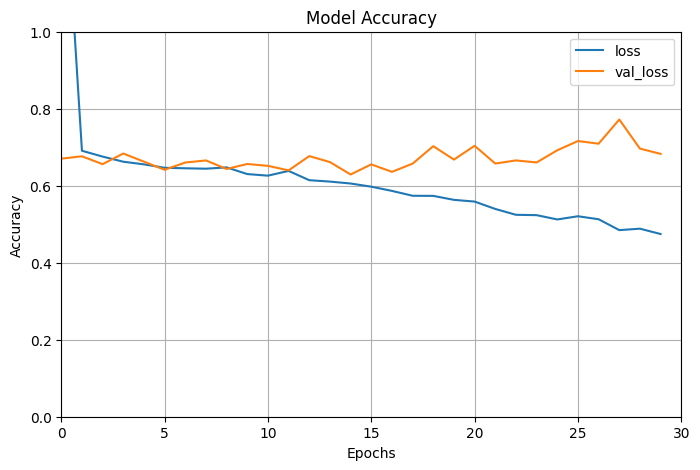

In [ ]:
df= pd.DataFrame(history_1.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8, 5))
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,30)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

# Visualizing the accuracy of model_2 (with early stopping) at train & validation

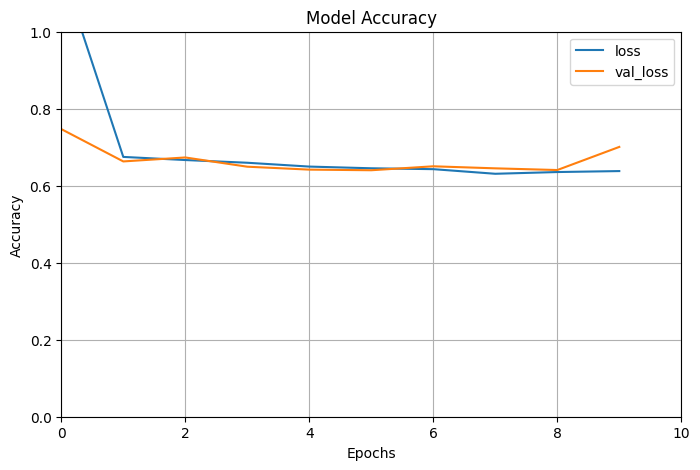

In [ ]:
df= pd.DataFrame(history_2.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8, 5))
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,10)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()